In [2]:
from IPython.display import HTML
import time

handle = display(HTML("""<marquee>👌</marquee>"""), display_id='html_marquee1')
time.sleep(2)
handle = display(HTML("""<marquee>~ “AI is likely to have ... transformative effects across society and a whole wide range of industries, increasing economic productivity, accelerating scientific progress, and transforming military power.” – Paul Scharre</marquee>"""), display_id='html_marquee1', update=True)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [5]:
df = pd.read_csv('AI_Index_db.csv')
df.head()

Country  Talent  Infrastructure  Operating Environment  \
0  United States of America  100.00           94.02                  64.56   
1                     China   16.51          100.00                  91.57   
2            United Kingdom   39.65           71.43                  74.65   
3                    Canada   31.28           77.05                  93.94   
4                    Israel   35.76           67.58                  82.44   

   Research  Development  Government Strategy  Commercial  Total score  \
0    100.00       100.00                77.39      100.00       100.00   
1     71.42        79.97                94.87       44.02        62.92   
2     36.50        25.03                82.82       18.91        40.93   
3     30.67        25.78               100.00       14.88        40.19   
4     32.63        27.96                43.91       27.33        39.89   

         Region                Cluster  Income group   Political regime  
0      Americas          Power players          High  Liberal democracy  
1  Asia-Pacific          Power players  Upper middle   Closed autocracy  
2        Europe  Traditional champions          High  Liberal democracy  
3      Americas  Traditional champions          High  Liberal democracy  
4   Middle East           Rising stars          High  Liberal democracy

In [6]:
df.shape

(62, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                62 non-null     object 
 1   Talent                 62 non-null     float64
 2   Infrastructure         62 non-null     float64
 3   Operating Environment  62 non-null     float64
 4   Research               62 non-null     float64
 5   Development            62 non-null     float64
 6   Government Strategy    62 non-null     float64
 7   Commercial             62 non-null     float64
 8   Total score            62 non-null     float64
 9   Region                 62 non-null     object 
 10  Cluster                62 non-null     object 
 11  Income group           62 non-null     object 
 12  Political regime       62 non-null     object 
dtypes: float64(8), object(5)
memory usage: 6.4+ KB


In [8]:
df.describe()

Talent  Infrastructure  Operating Environment    Research  \
count   62.000000       62.000000              62.000000   62.000000   
mean    16.803065       63.503710              66.925484   16.610000   
std     15.214963       20.217525              20.000424   17.413996   
min      0.000000        0.000000               0.000000    0.000000   
25%      7.365000       55.857500              58.107500    3.032500   
50%     13.445000       65.230000              69.505000   12.930000   
75%     24.567500       75.947500              80.500000   25.412500   
max    100.000000      100.000000             100.000000  100.000000   

       Development  Government Strategy  Commercial  Total score  
count    62.000000            62.000000   62.000000    62.000000  
mean     14.824677            57.865645    6.171935    23.914677  
std      19.419279            26.252448   14.029632    15.123586  
min       0.000000             0.000000    0.000000     0.000000  
25%       1.202500            41.030000    0.697500    14.805000  
50%       9.005000            63.930000    2.585000    23.220000  
75%      19.980000            77.952500    5.307500    30.487500  
max     100.000000           100.000000  100.000000   100.000000

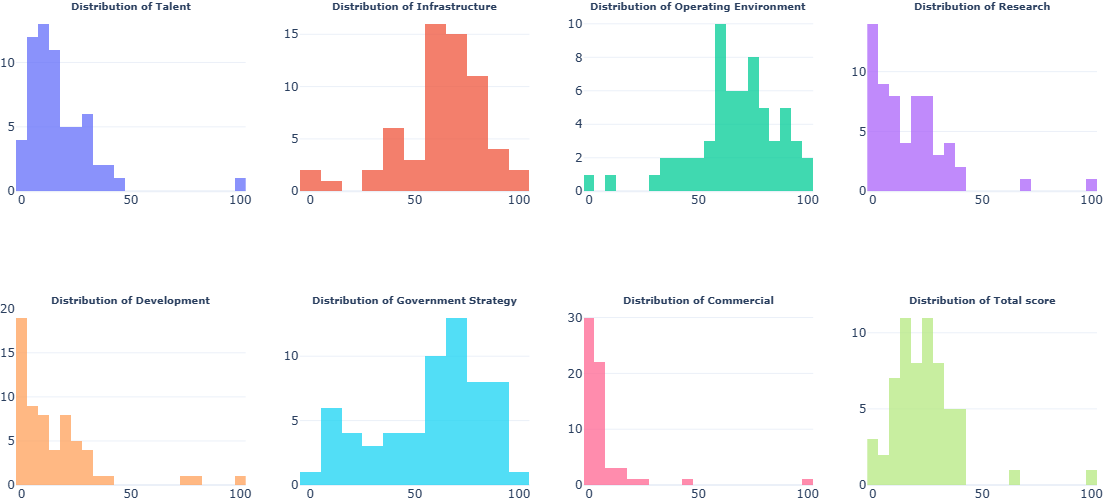

In [9]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Talent</b>',
                                                    '<b>Distribution of Infrastructure</b>',
                                                    '<b>Distribution of Operating Environment</b>',
                                                    '<b>Distribution of Research</b>',
                                                    '<b>Distribution of Development</b>',
                                                    '<b>Distribution of Government Strategy</b>',
                                                    '<b>Distribution of Commercial</b>',
                                                    '<b>Distribution of Total score</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['Talent'], nbinsx=30), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Infrastructure']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Operating Environment'], nbinsx=30), row=1, col=3)
fig.add_trace(go.Histogram(x=df['Research'], nbinsx=30), row=1, col=4)

fig.add_trace(go.Histogram(x=df['Development'], nbinsx=30), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Government Strategy']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['Commercial'], nbinsx=30), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Total score'], nbinsx=30), row=2, col=4)

                                
# Update visual layout
fig.update_layout(
    showlegend=False,
    width=800,
    height=500,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=10)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

<Axes: >

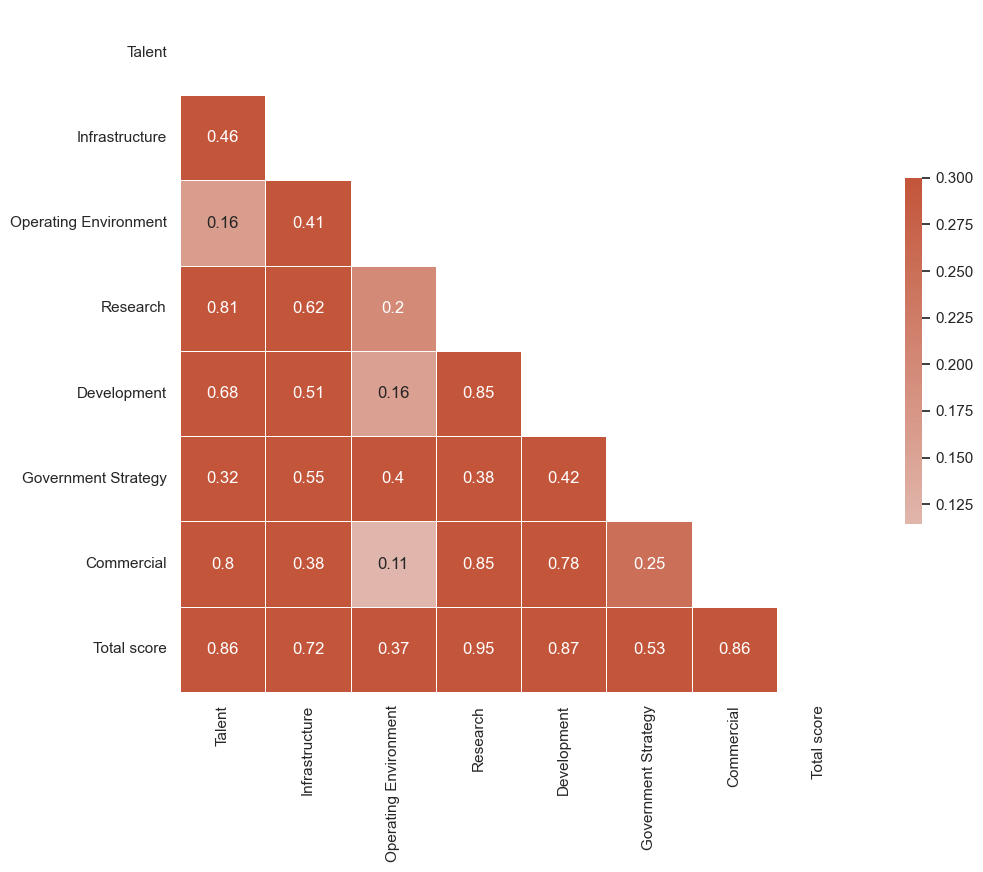

In [11]:
sns.set_theme(style="white")

# make a dataframe with only numberic variables, without 'Outcome'
d = df.copy()

# Compute the correlation matrix for numeric features
corr = d.select_dtypes(include=['number']).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

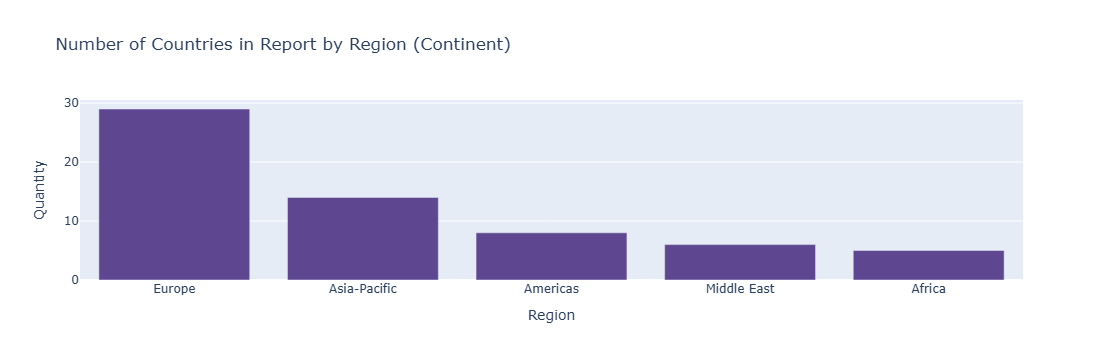

In [12]:
dfg = df['Region'].value_counts().reset_index()
dfg.columns = ['Region', 'Quantity']
fig = px.bar(dfg, x='Region', y='Quantity', 
             title='Number of Countries in Report by Region (Continent)',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

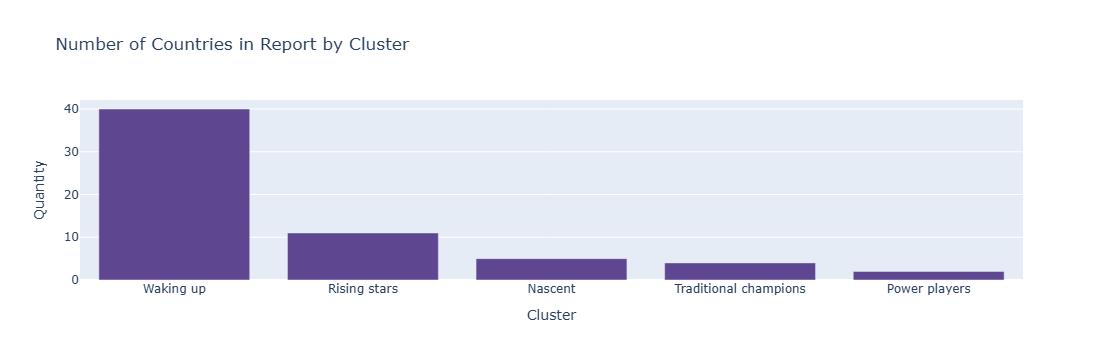

In [13]:
dfg = df['Cluster'].value_counts().reset_index()
dfg.columns = ['Cluster', 'Quantity']
fig = px.bar(dfg, x='Cluster', y='Quantity', 
             title='Number of Countries in Report by Cluster',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

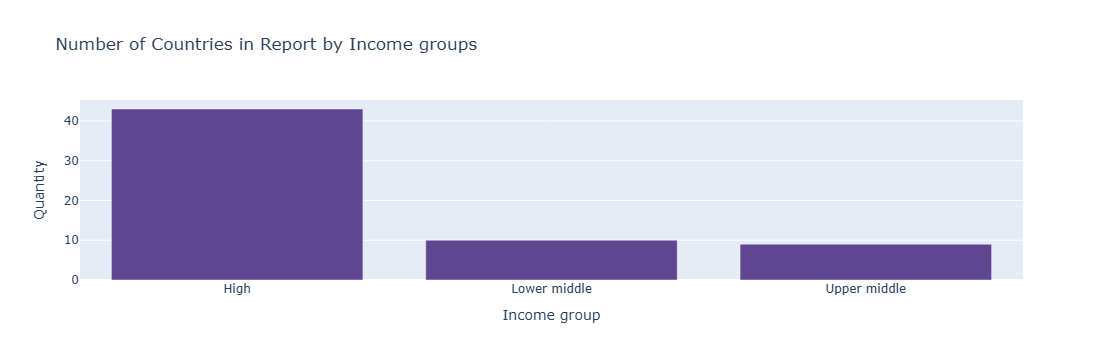

In [14]:
dfg = df['Income group'].value_counts().reset_index()
dfg.columns = ['Income group', 'Quantity']
fig = px.bar(dfg, x='Income group', y='Quantity', 
             title='Number of Countries in Report by Income groups',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

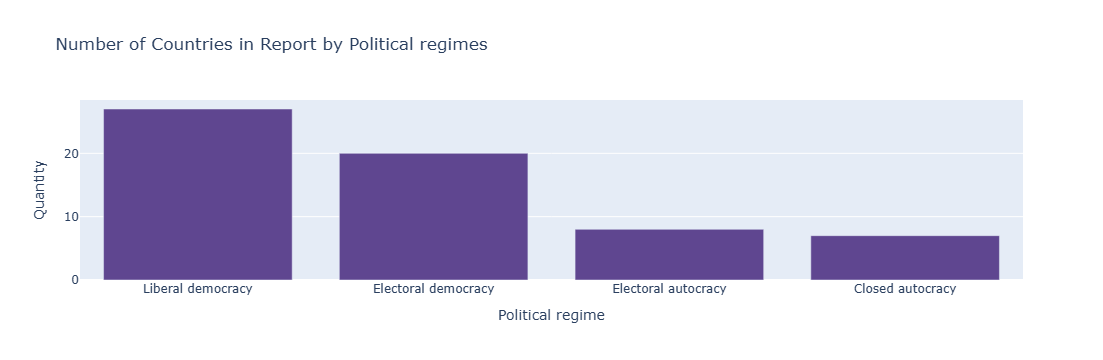

In [15]:
dfg = df['Political regime'].value_counts().reset_index()
dfg.columns = ['Political regime', 'Quantity']
fig = px.bar(dfg, x='Political regime', y='Quantity', 
             title='Number of Countries in Report by Political regimes',
            color_discrete_sequence=px.colors.qualitative.Prism) 
fig.show()

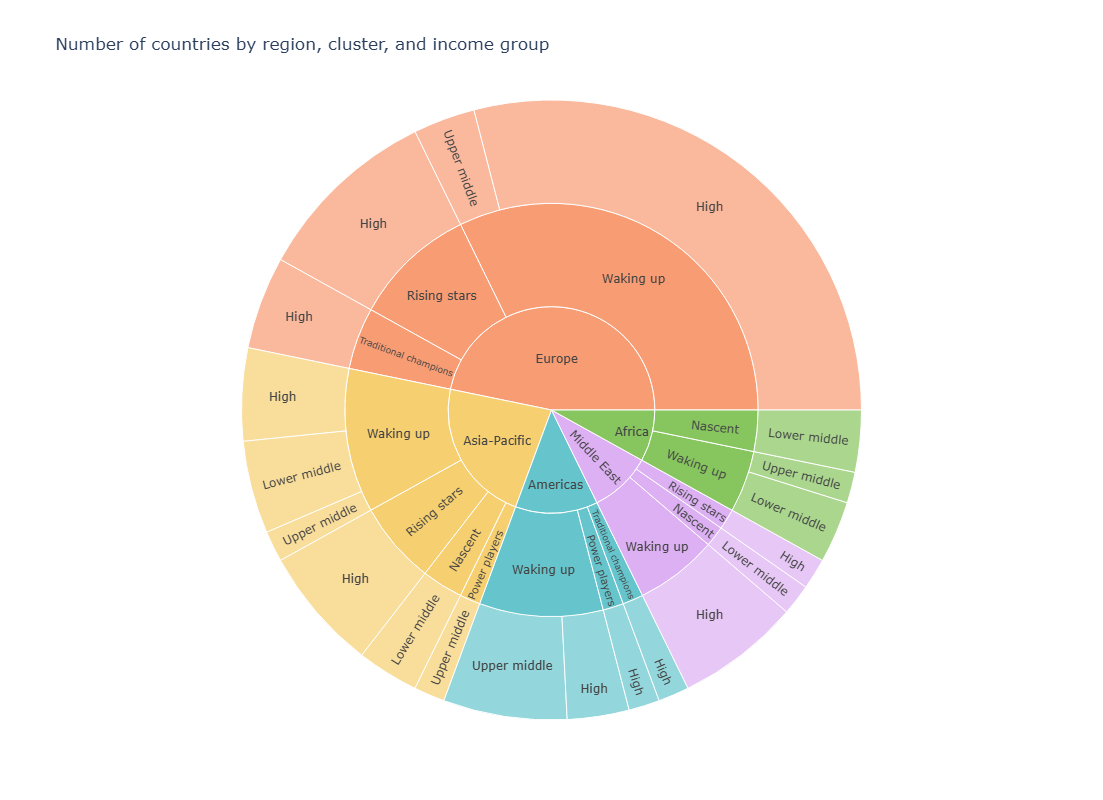

In [16]:
agg_data = df[["Region", "Cluster", "Income group"]].groupby(["Region", "Cluster", "Income group"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Cluster", "Income group"],
    title="Number of countries by region, cluster, and income group",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

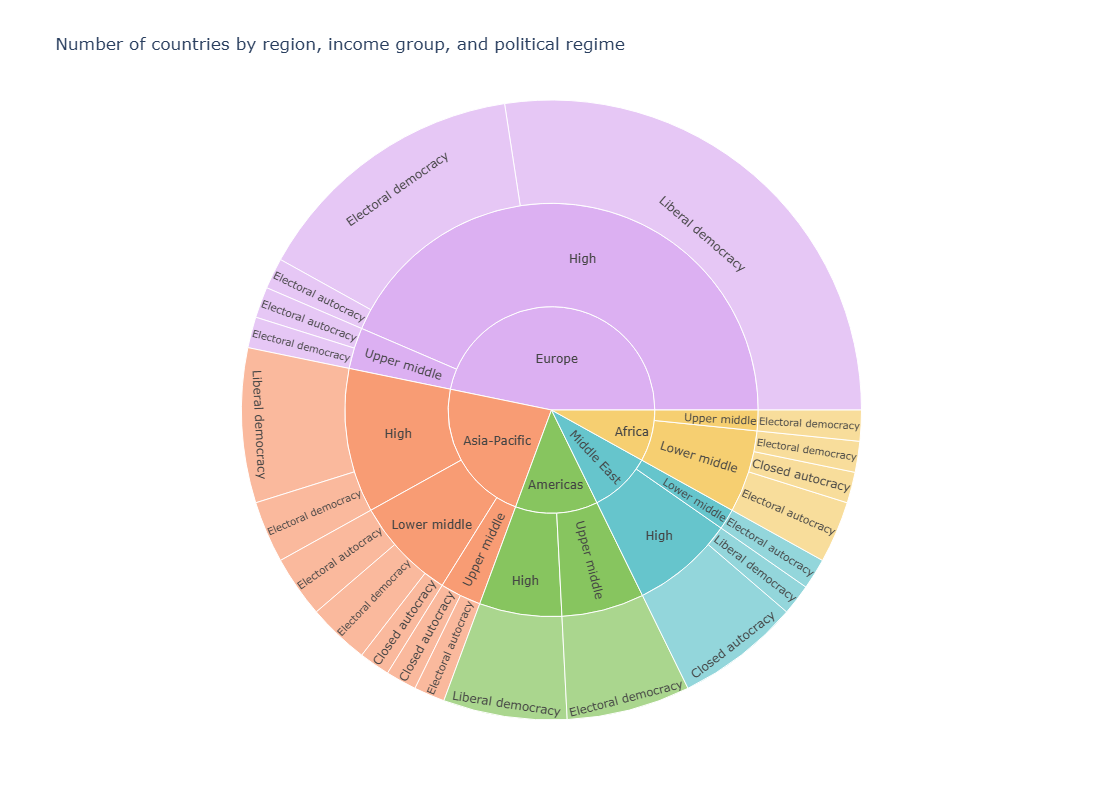

In [17]:
agg_data = df[["Region", "Income group", "Political regime"]].groupby(["Region", "Income group", "Political regime"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Income group", "Political regime"],
    title="Number of countries by region, income group, and political regime",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

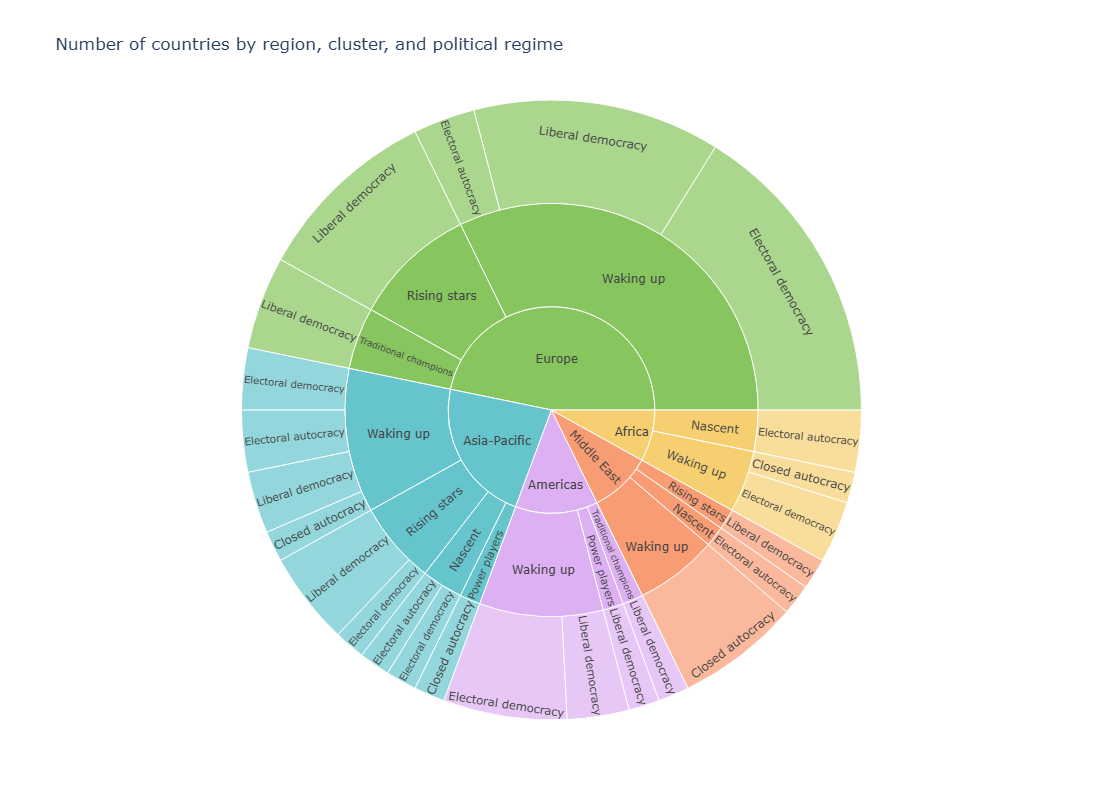

In [18]:
agg_data = df[["Region", "Cluster", "Political regime"]].groupby(["Region", "Cluster", "Political regime"]).size().reset_index(name="Count")
# define figure element
fig = px.sunburst(
    agg_data,
    values='Count',
    path=["Region", "Cluster", "Political regime"],
    title="Number of countries by region, cluster, and political regime",
    color="Region",
    height=800,
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# display the figure
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\1032325424.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



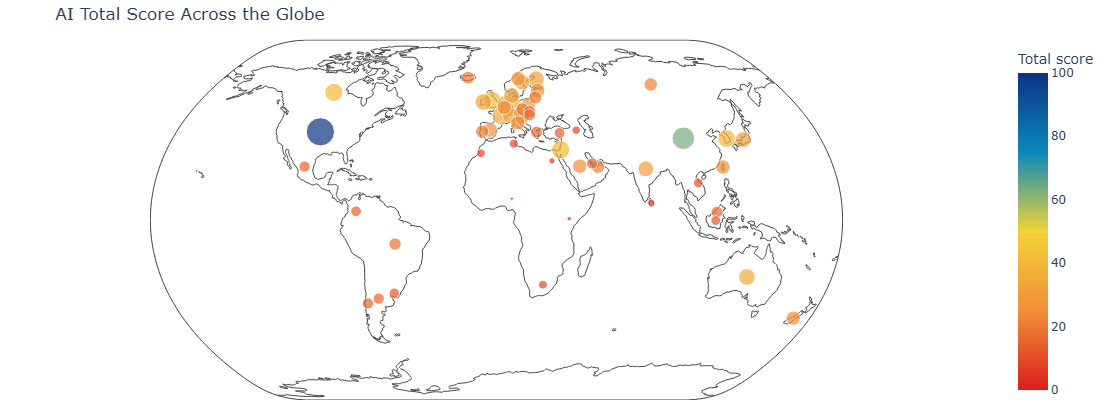

In [20]:
total_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Total score']]
# set the size of the geo bubble
def set_score_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value 
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

total_df['Size'] = total_df.apply(lambda x: set_score_size(x['Total score']), axis=1)

fig = px.scatter_geo(
    total_df, locations="Country", locationmode='country names', 
    color="Total score", 
    size='Size', hover_name="Country", 
    range_color= [0, 100], 
    projection="natural earth",
    title='AI Total Score Across the Globe', 
    color_continuous_scale="portland_r")

# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [21]:
total_df.sort_values('Total score', 
                   ascending=False)[
                        [ 
                          'Country',
                          'Total score'
                        ]
][:10].style.background_gradient(cmap='seismic')

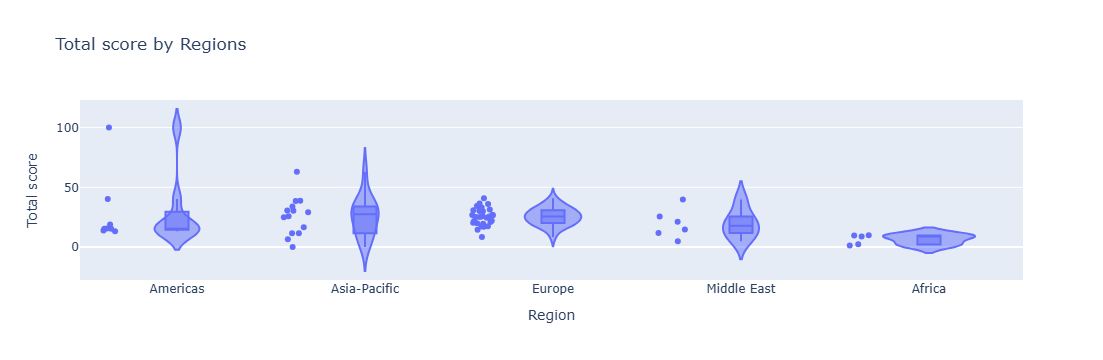

In [22]:
fig = px.violin(total_df, y="Total score", x="Region", box=True, points="all", title="Total score by Regions", hover_data=total_df.columns)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\557914263.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



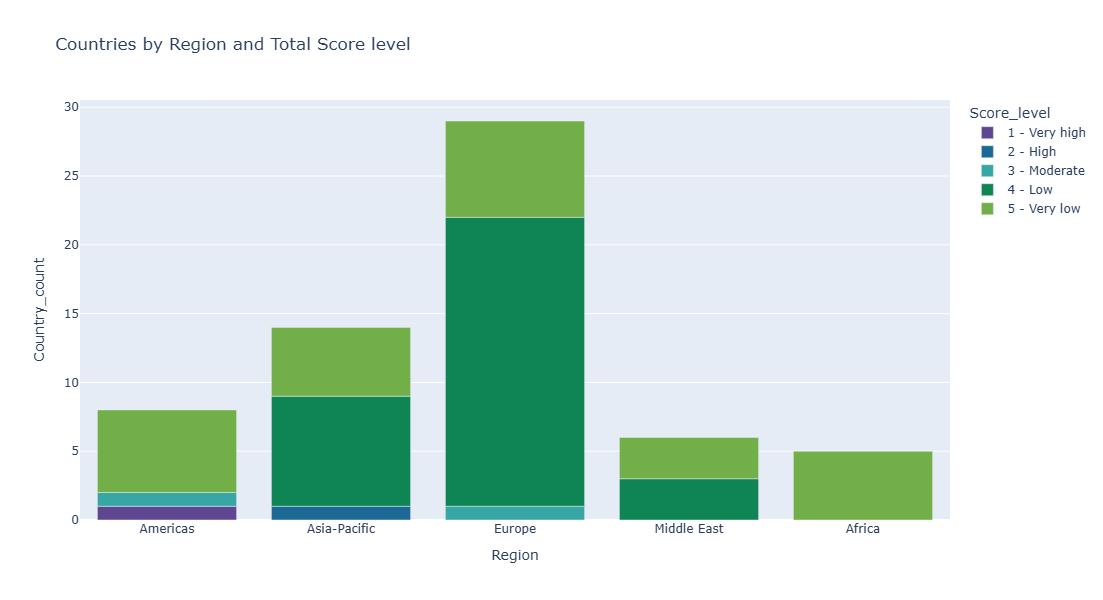

In [23]:
# implement binning by Total Score categories

def set_score_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

total_df["Score_level"] = total_df["Total score"].apply(set_score_level)

agg_data = total_df.groupby(['Region', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Region', 
    y='Country_count', 
    color='Score_level', 
    title="Countries by Region and Total Score level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

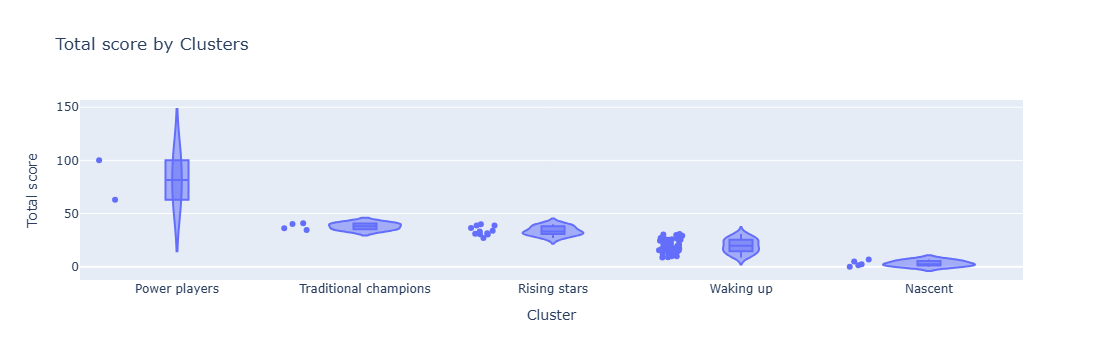

In [24]:
fig = px.violin(total_df, y="Total score", x="Cluster", box=True, points="all", title="Total score by Clusters", hover_data=total_df.columns)
fig.show()

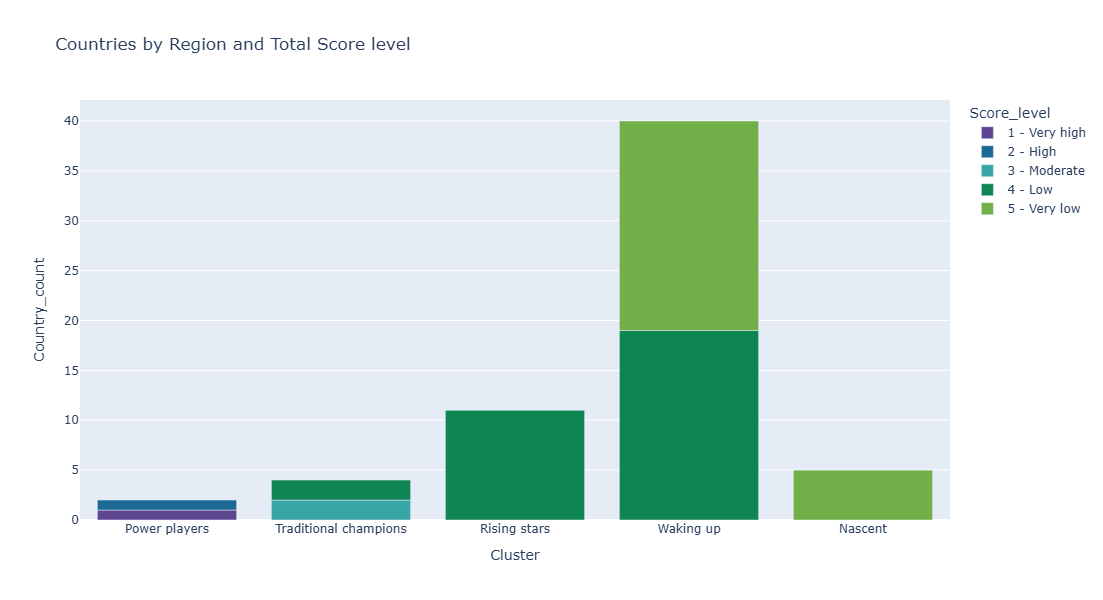

In [25]:
agg_data = total_df.groupby(['Cluster', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Cluster', 
    y='Country_count', 
    color='Score_level', 
    title="Countries by Region and Total Score level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

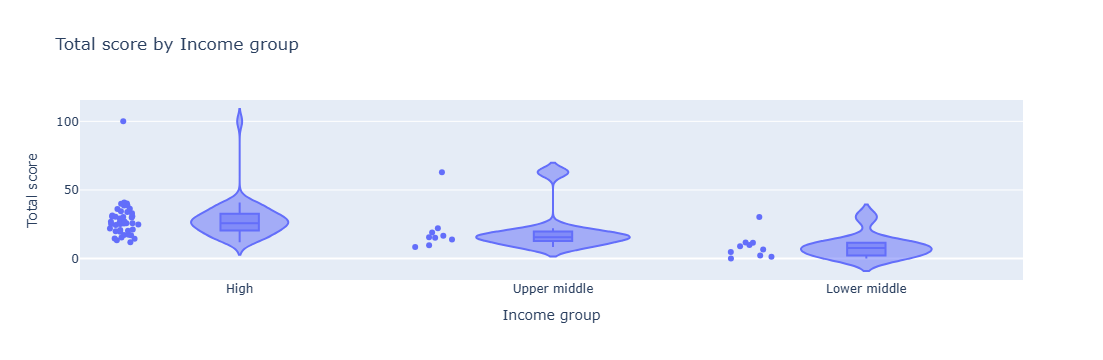

In [26]:
g = px.violin(total_df, y="Total score", x="Income group", box=True, points="all", title="Total score by Income group", hover_data=total_df.columns)
g.show()

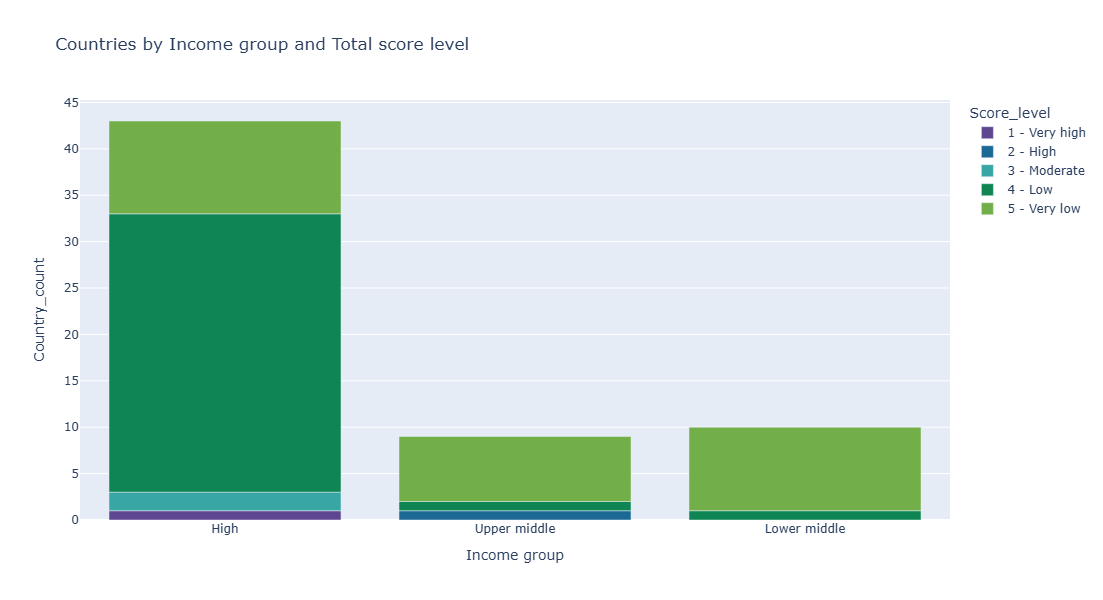

In [27]:
agg_data = total_df.groupby(['Income group', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Income group', 
    y='Country_count', 
    color='Score_level', 
    title="Countries by Income group and Total score level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

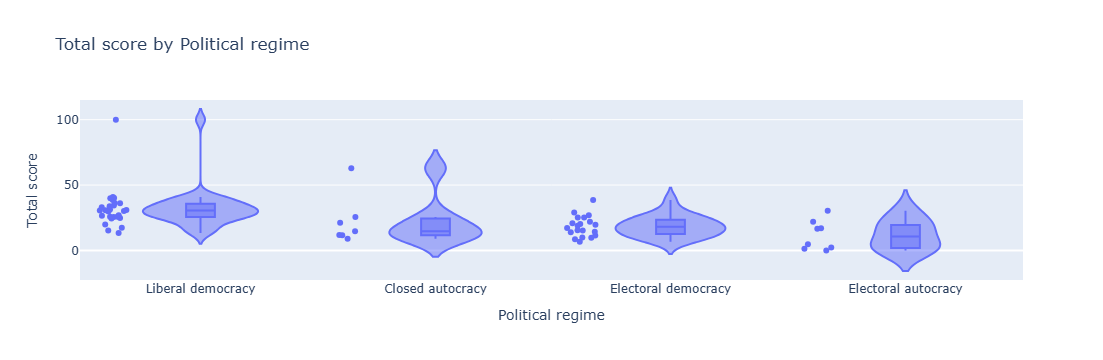

In [28]:
g = px.violin(total_df, y="Total score", x="Political regime", box=True, points="all", title="Total score by Political regime", hover_data=total_df.columns)
g.show()

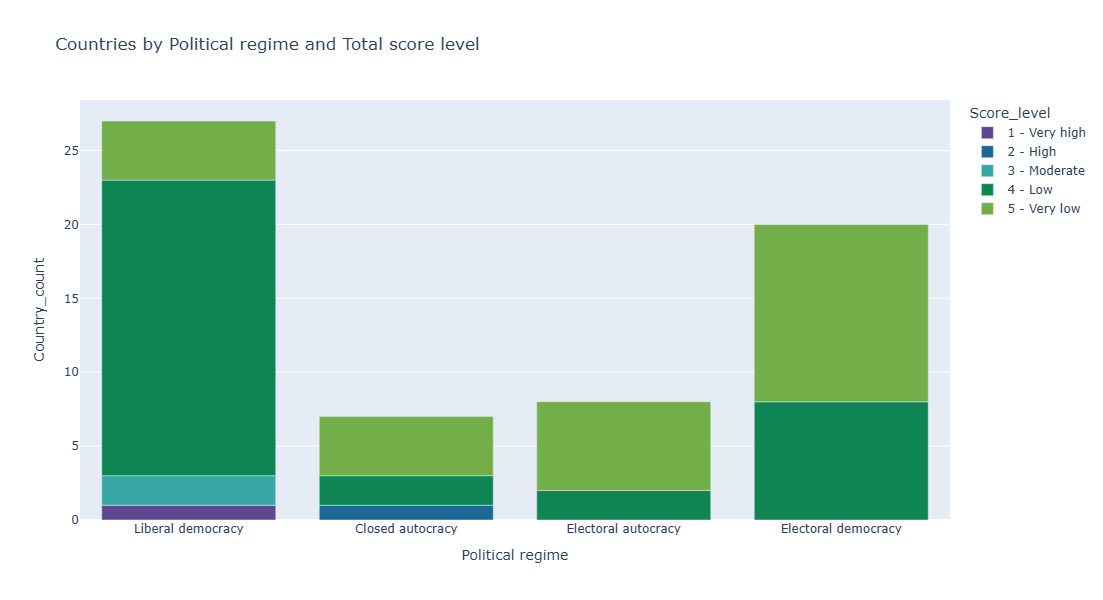

In [29]:
agg_data = total_df.groupby(['Political regime', 'Score_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Score_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Political regime', 
    y='Country_count', 
    color='Score_level', 
    title="Countries by Political regime and Total score level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

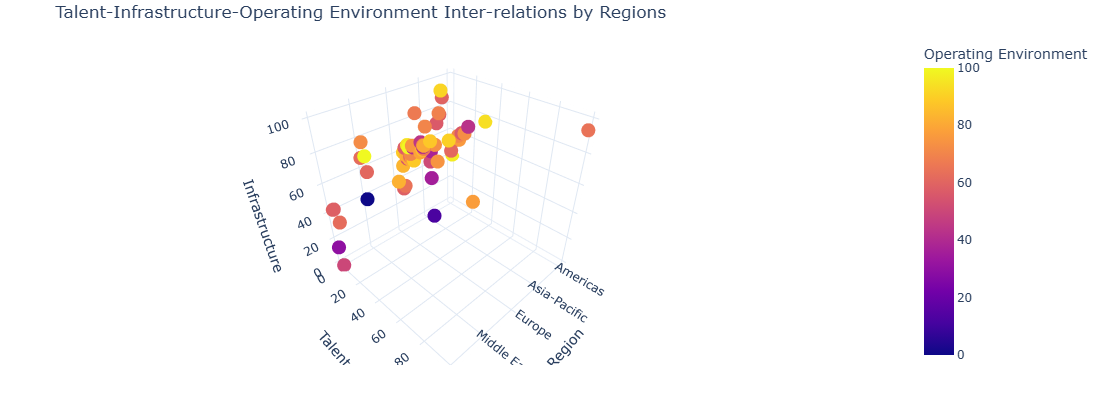

In [30]:
fig = px.scatter_3d(df, x='Region', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country", 
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

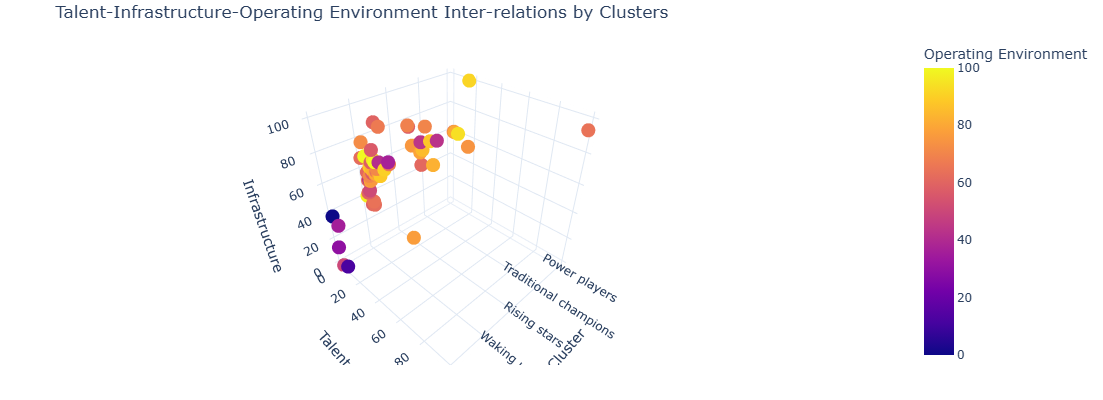

In [31]:
fig = px.scatter_3d(df, x='Cluster', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country", 
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

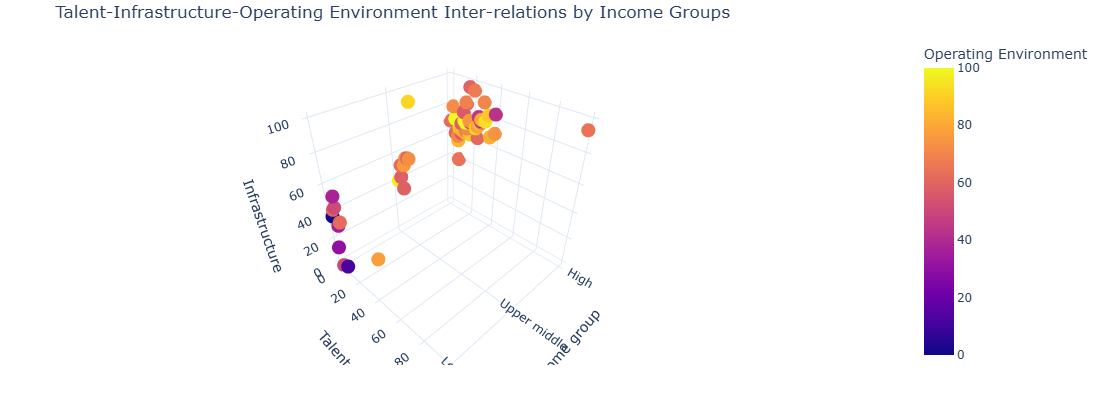

In [32]:
fig = px.scatter_3d(df, x='Income group', y='Talent', z='Infrastructure', color='Operating Environment', hover_name="Country", 
                   title='Talent-Infrastructure-Operating Environment Inter-relations by Income Groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

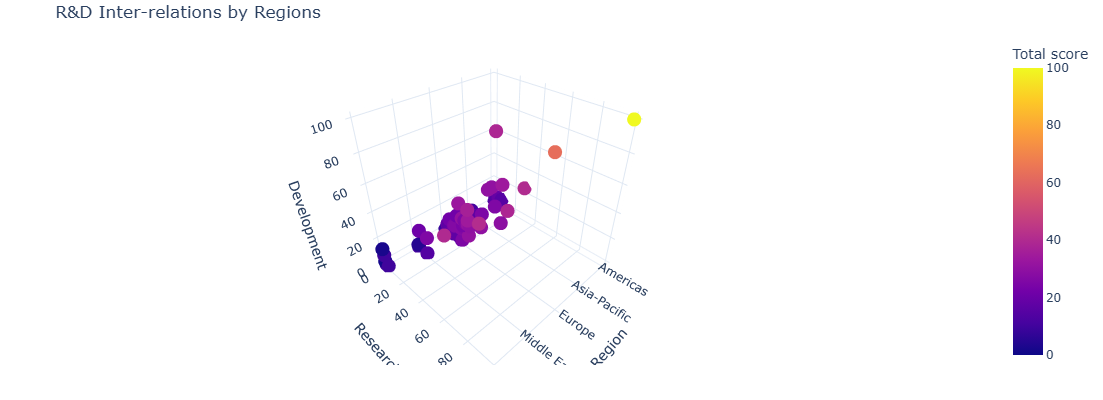

In [33]:
fig = px.scatter_3d(df, x='Region', y='Research', z='Development', color='Total score', hover_name="Country", 
                   title='R&D Inter-relations by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

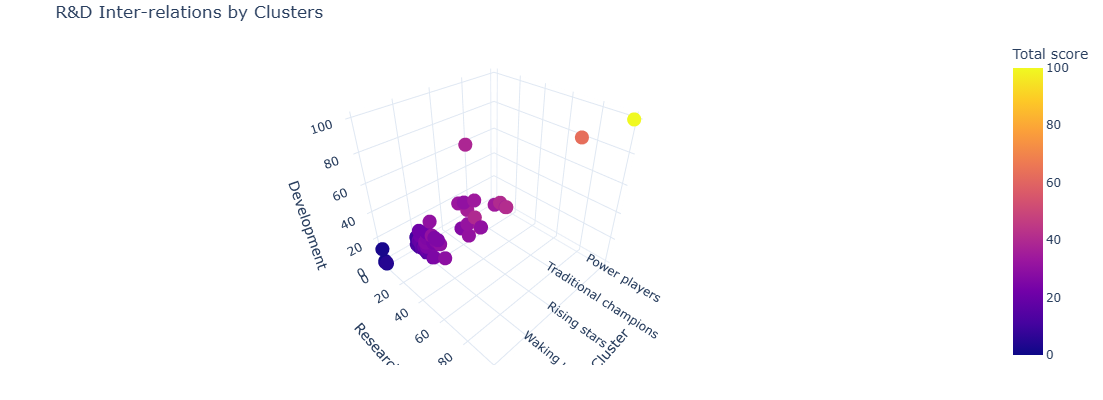

In [34]:
fig = px.scatter_3d(df, x='Cluster', y='Research', z='Development', color='Total score', hover_name="Country", 
                   title='R&D Inter-relations by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

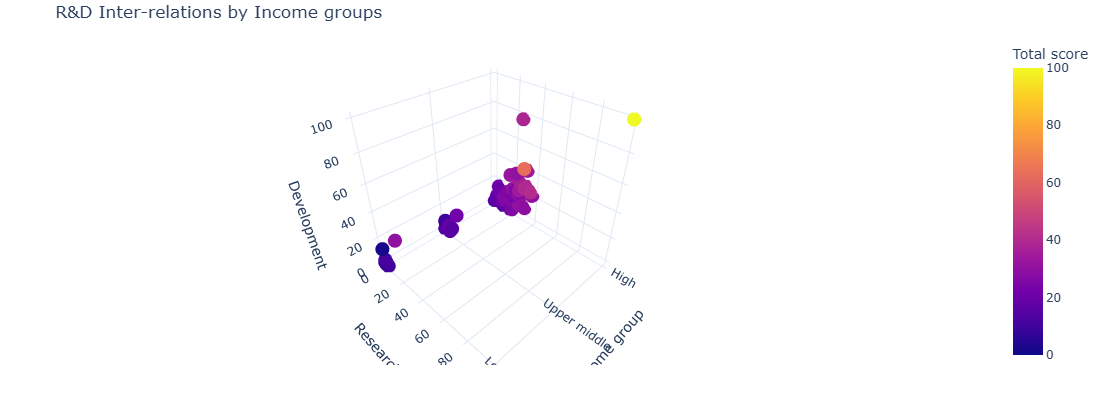

In [35]:
fig = px.scatter_3d(df, x='Income group', y='Research', z='Development', color='Total score', hover_name="Country", 
                   title='R&D Inter-relations by Income groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

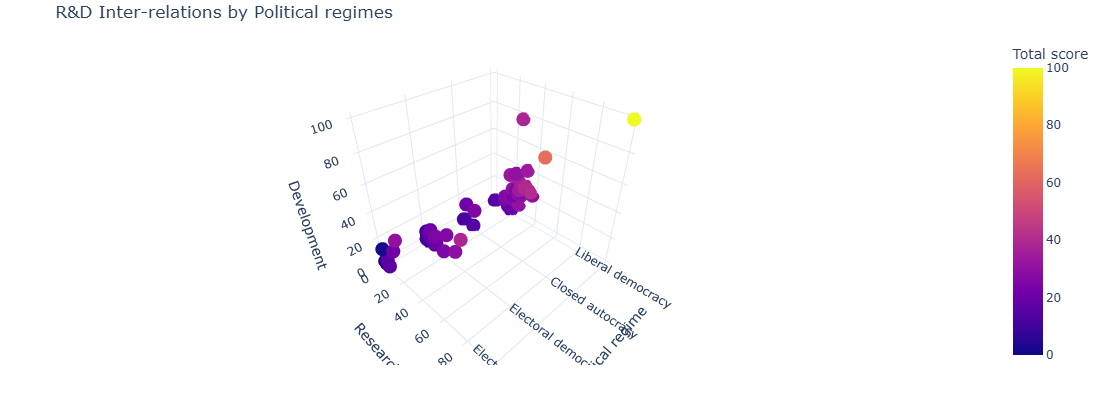

In [36]:
fig = px.scatter_3d(df, x='Political regime', y='Research', z='Development', color='Total score', hover_name="Country", 
                   title='R&D Inter-relations by Political regimes')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

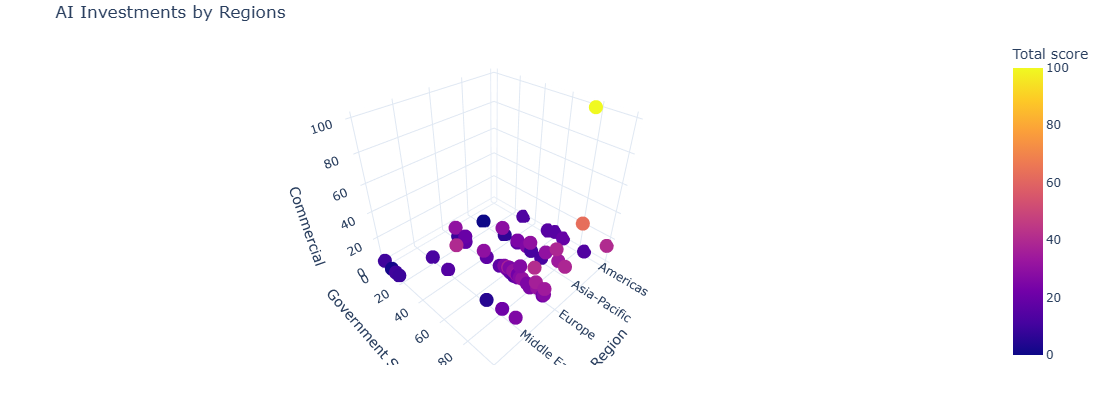

In [37]:
fig = px.scatter_3d(df, x='Region', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country", 
                   title='AI Investments by Regions')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [38]:
fig = px.scatter_3d(df, x='Cluster', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country", 
                   title='AI Investments by Clusters')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [39]:
fig = px.scatter_3d(df, x='Income group', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country", 
                   title='AI Investments by Income groups')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [40]:
fig = px.scatter_3d(df, x='Political regime', y='Government Strategy', z='Commercial', color='Total score', hover_name="Country", 
                   title='AI Investments by Political regimes')
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=35, b=35, l=5, r=5),
    template="plotly_white",
)
fig.show()

In [41]:
talent_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Talent']]

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\2054473121.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



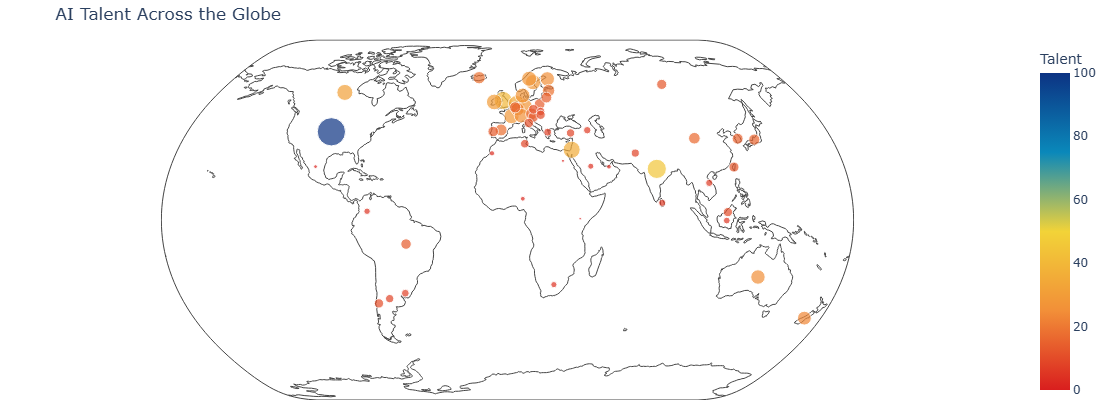

In [42]:
# set the size of the geo bubble
def set_talent_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value 
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

talent_df['Size'] = talent_df.apply(lambda x: set_talent_size(x['Talent']), axis=1)

fig = px.scatter_geo(
    talent_df, locations="Country", locationmode='country names', 
    color="Talent", 
    size='Size', hover_name="Country", 
    range_color= [0, 100], 
    projection="natural earth",
    title='AI Talent Across the Globe', 
    color_continuous_scale="portland_r")
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [43]:
talent_df.sort_values('Talent', 
                   ascending=False)[
                        [ 
                          'Country',
                          'Talent'
                        ]
][:10].style.background_gradient(cmap='seismic')

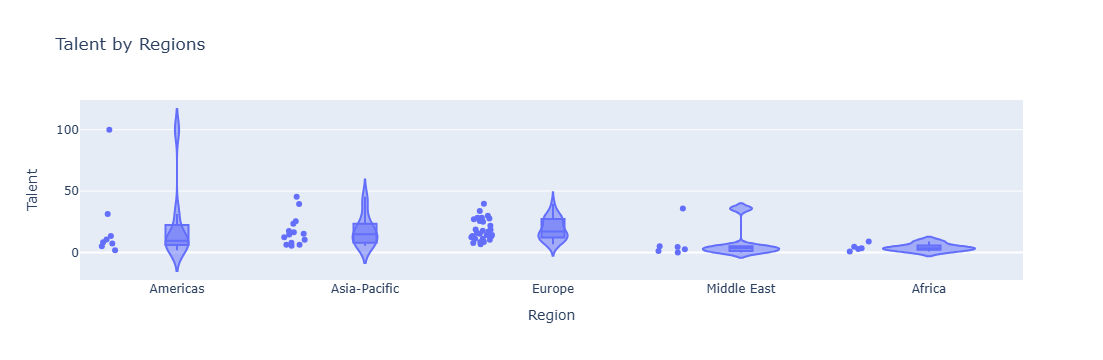

In [44]:
fig = px.violin(talent_df, y="Talent", x="Region", box=True, points="all", title="Talent by Regions", hover_data=talent_df.columns)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\3831120212.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



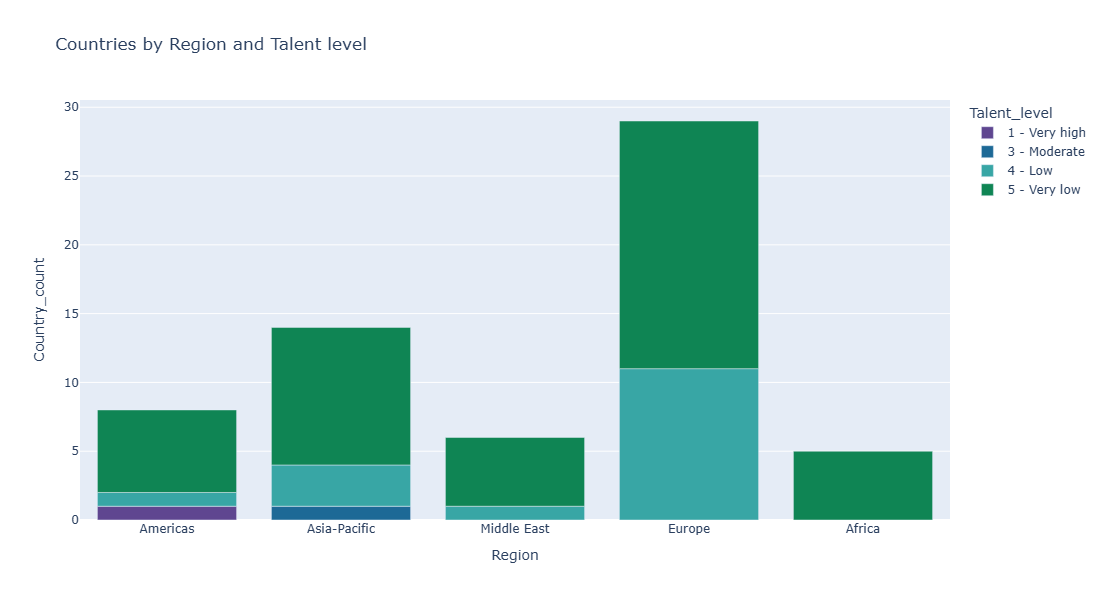

In [45]:
# implement binning by Talent categories

def set_talent_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

talent_df["Talent_level"] = talent_df["Talent"].apply(set_talent_level)

agg_data = talent_df.groupby(['Region', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Region', 
    y='Country_count', 
    color='Talent_level',
     title="Countries by Region and Talent level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

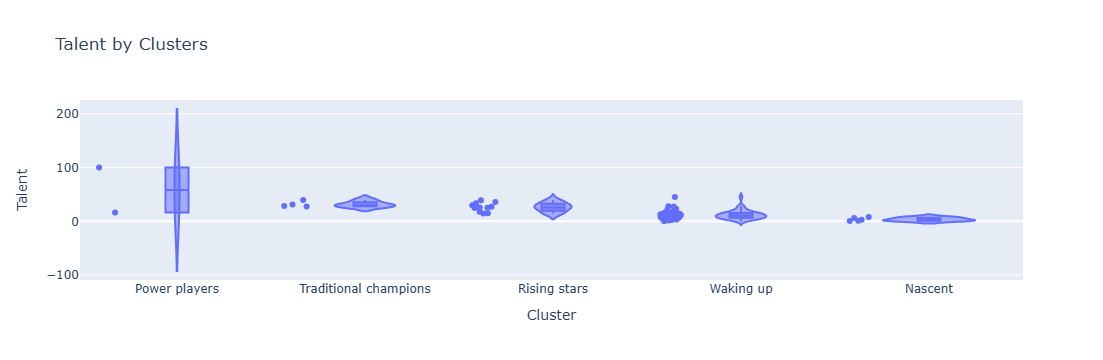

In [46]:
fig = px.violin(talent_df, y="Talent", x="Cluster", box=True, points="all", title="Talent by Clusters", hover_data=talent_df.columns)
fig.show()

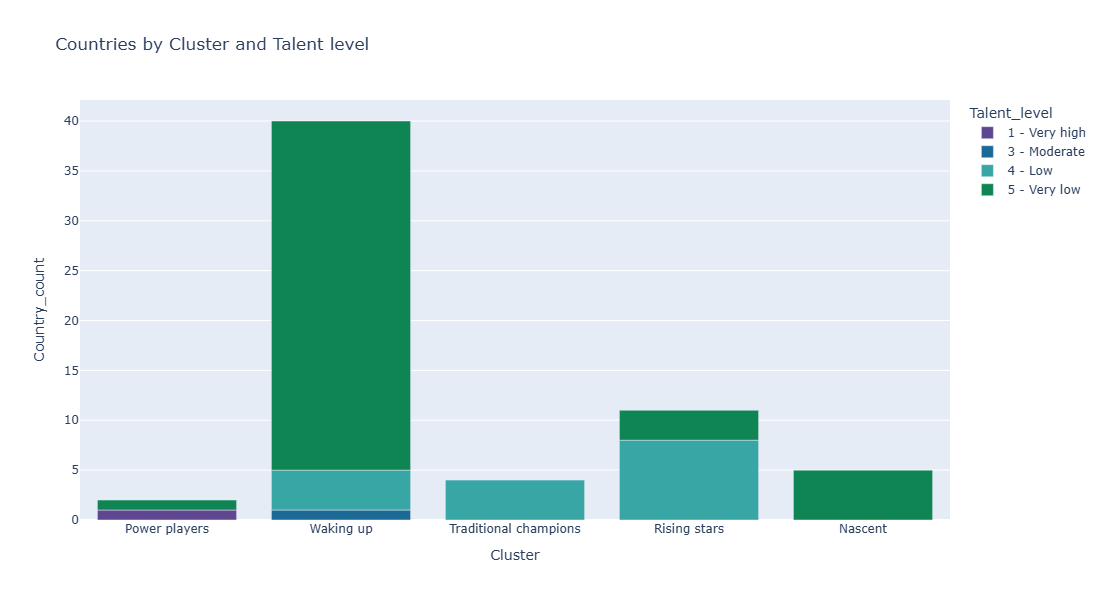

In [47]:
agg_data = talent_df.groupby(['Cluster', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Cluster', 
    y='Country_count', 
    color='Talent_level', 
    title="Countries by Cluster and Talent level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

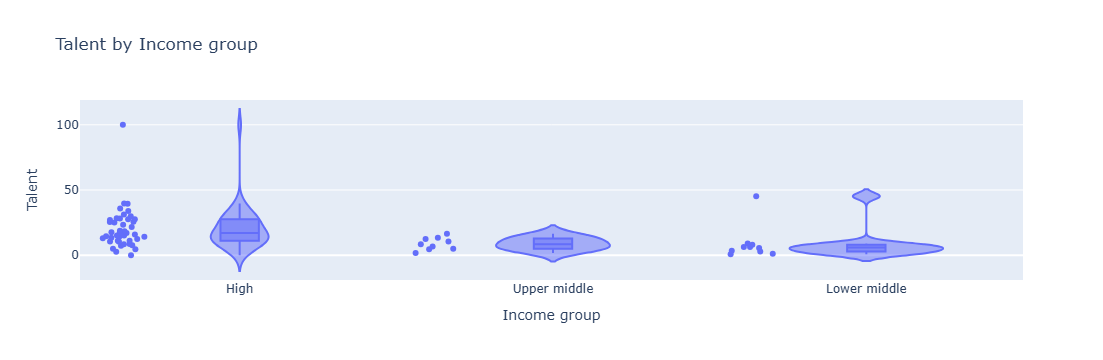

In [48]:
g = px.violin(talent_df, y="Talent", x="Income group", box=True, points="all", title="Talent by Income group", hover_data=talent_df.columns)
g.show()

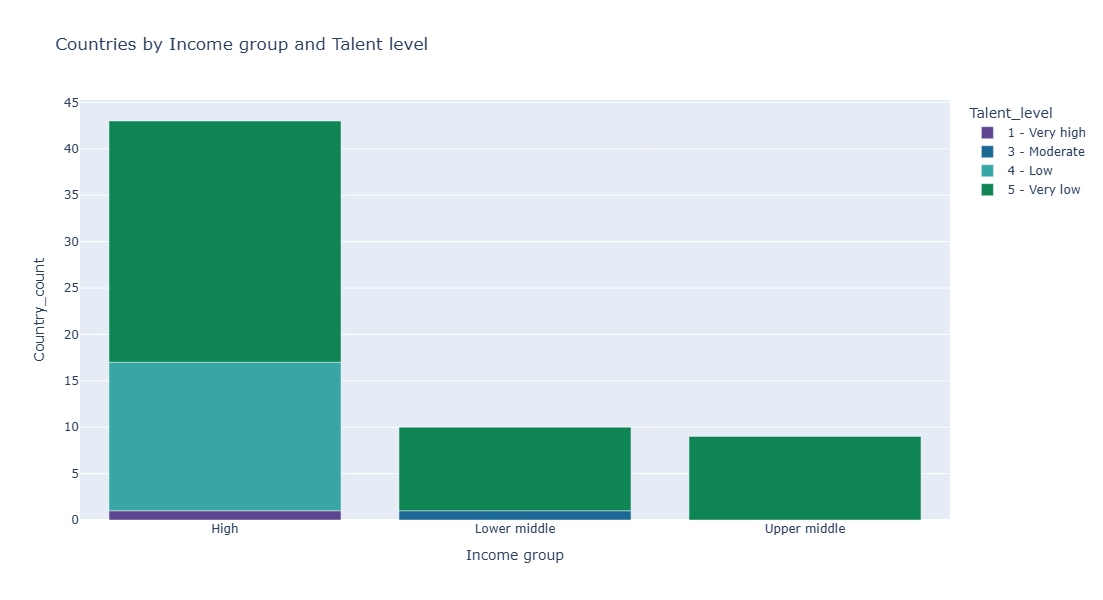

In [49]:
agg_data = talent_df.groupby(['Income group', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Income group', 
    y='Country_count', 
    color='Talent_level', 
    title="Countries by Income group and Talent level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

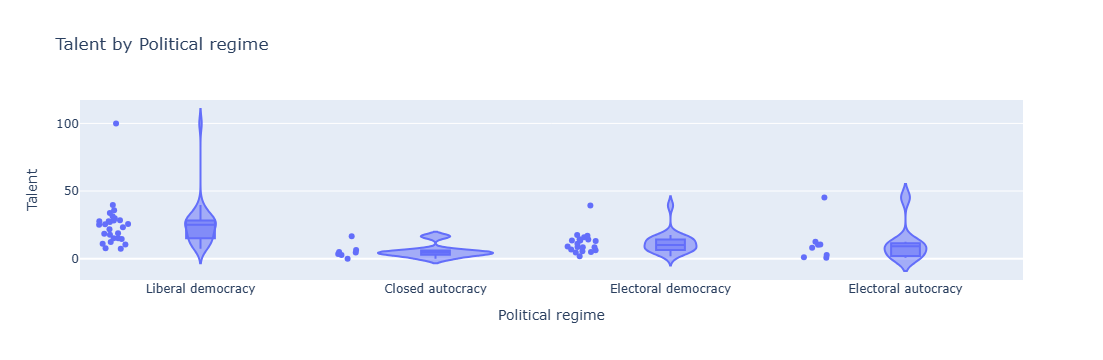

In [50]:
fig = px.violin(talent_df, y="Talent", x="Political regime", box=True, points="all", title="Talent by Political regime", hover_data=talent_df.columns)
fig.show()

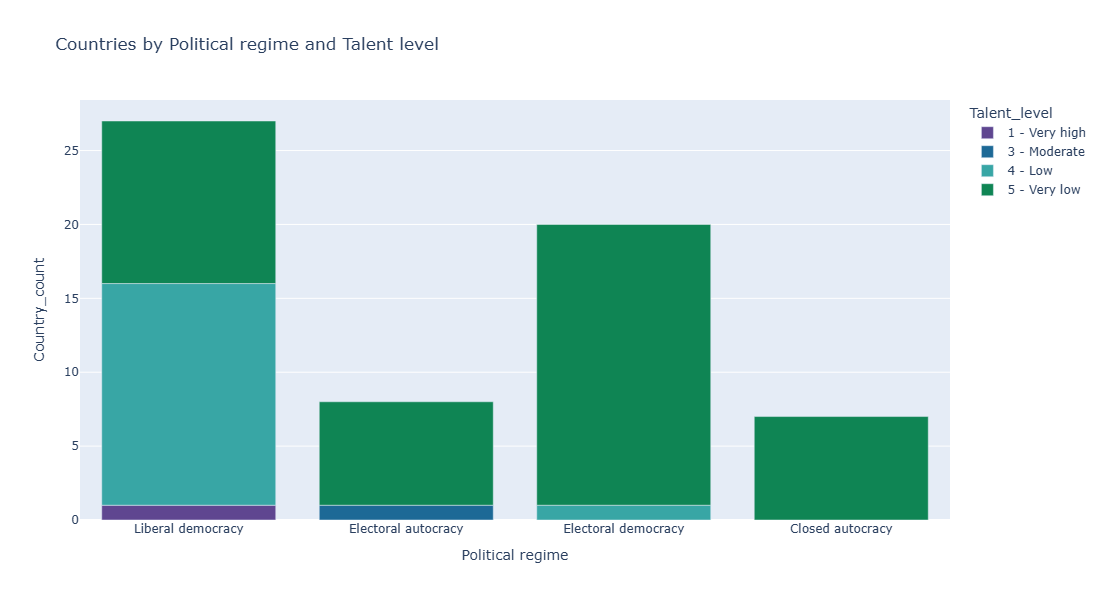

In [51]:
agg_data = talent_df.groupby(['Political regime', 'Talent_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Talent_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Political regime', 
    y='Country_count', 
    color='Talent_level', 
    title="Countries by Political regime and Talent level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

In [52]:
infra_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Infrastructure']]

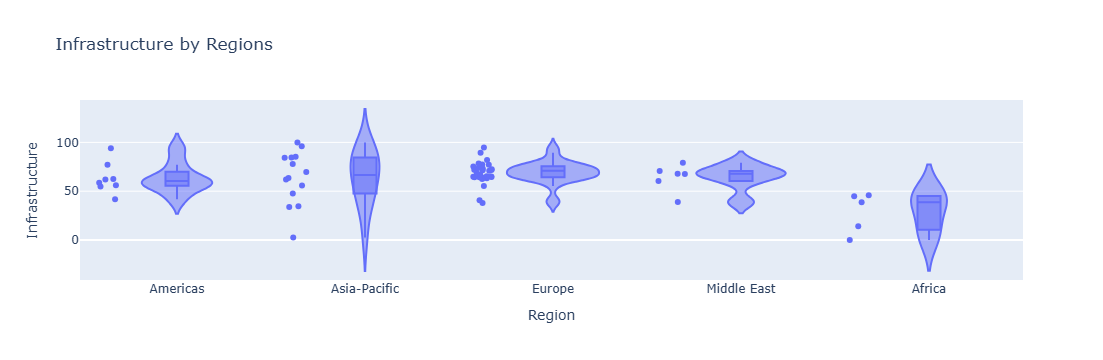

In [53]:
fig = px.violin(infra_df, 
                y="Infrastructure", 
                x="Region", 
                box=True, 
                points="all", 
                title="Infrastructure by Regions", 
                hover_data=infra_df.columns)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\3195673772.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



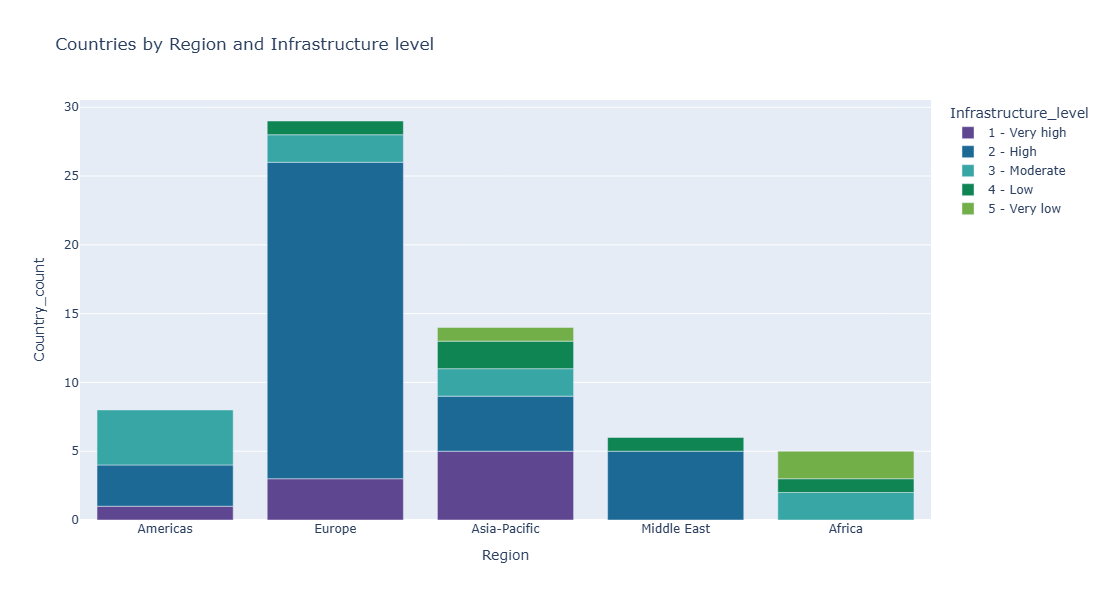

In [54]:
# implement binning by Infrastructure categories

def set_infrastructure_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

infra_df["Infrastructure_level"] = infra_df["Infrastructure"].apply(set_infrastructure_level)

agg_data = infra_df.groupby(['Region', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Region', 
    y='Country_count', 
    color='Infrastructure_level', 
    title="Countries by Region and Infrastructure level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()


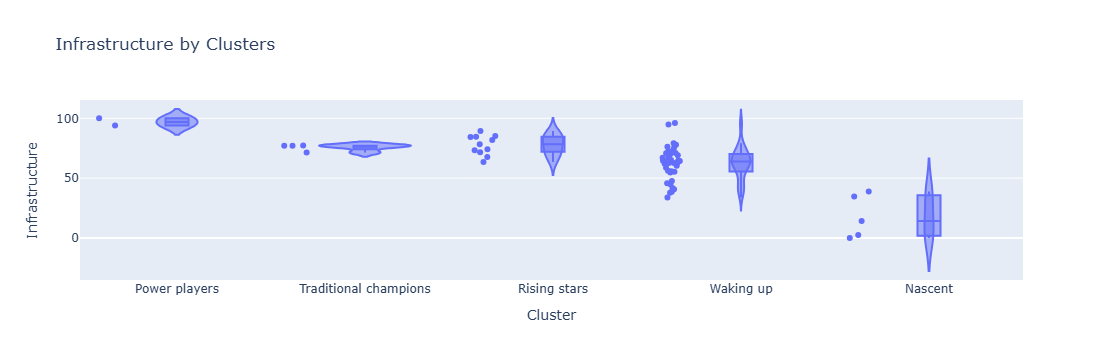

In [55]:
fig = px.violin(infra_df, 
                y="Infrastructure", 
                x="Cluster", 
                box=True, 
                points="all", 
                title="Infrastructure by Clusters", 
                hover_data=infra_df.columns)
fig.show()

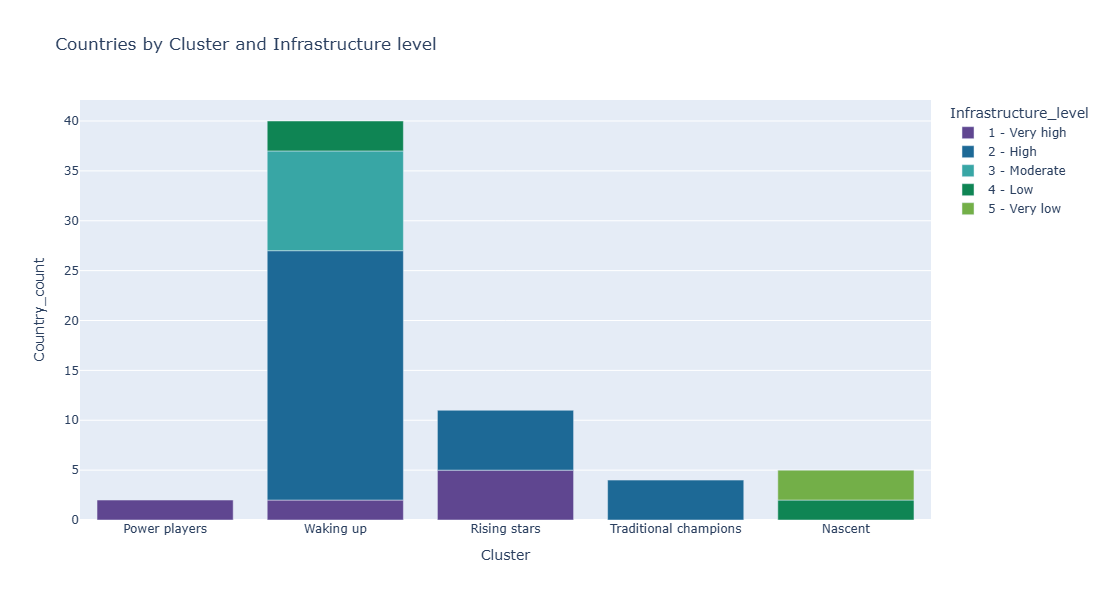

In [56]:
agg_data = infra_df.groupby(['Cluster', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Cluster', 
    y='Country_count', 
    color='Infrastructure_level', 
    title="Countries by Cluster and Infrastructure level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

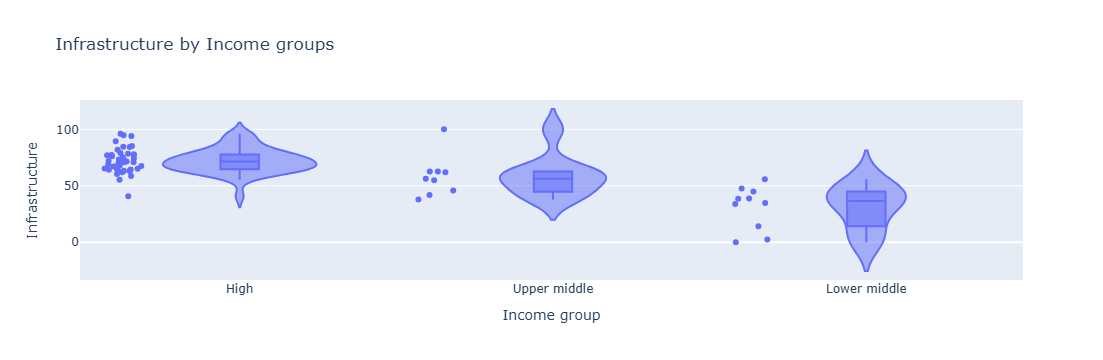

In [57]:
fig = px.violin(infra_df, 
                y="Infrastructure", 
                x="Income group", 
                box=True, 
                points="all", 
                title="Infrastructure by Income groups", 
                hover_data=infra_df.columns)
fig.show()

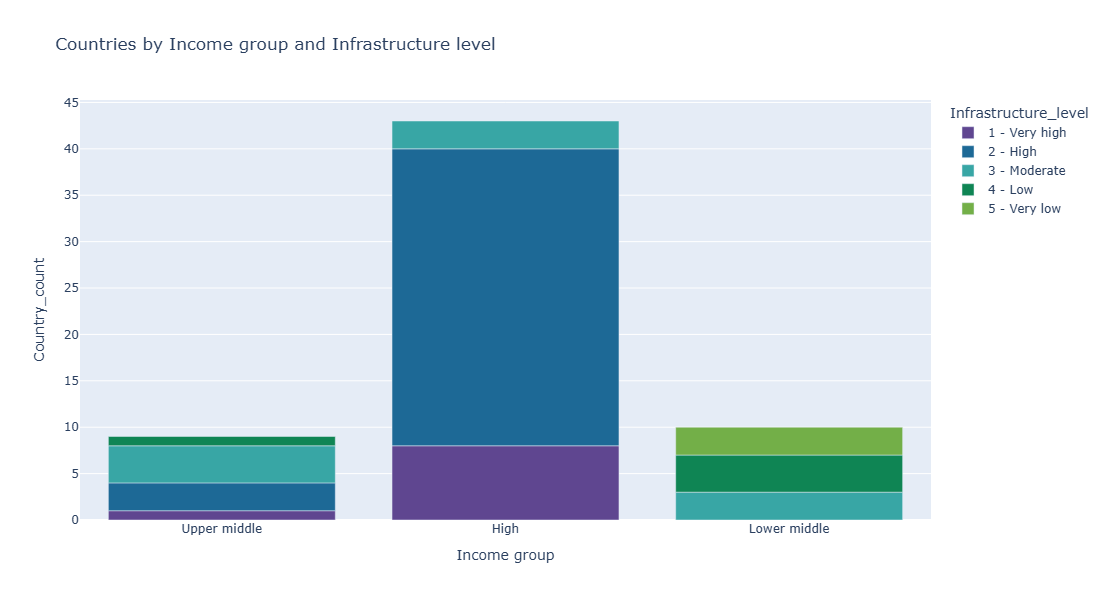

In [58]:
agg_data = infra_df.groupby(['Income group', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Income group', 
    y='Country_count', 
    color='Infrastructure_level', 
    title="Countries by Income group and Infrastructure level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

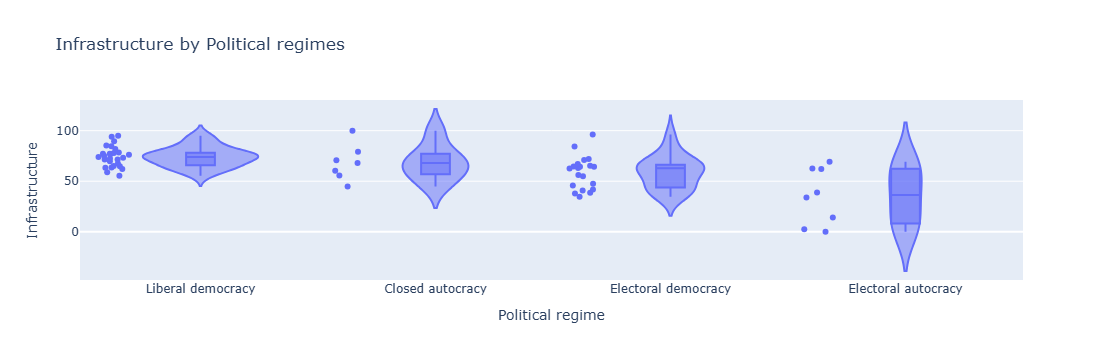

In [59]:
fig = px.violin(infra_df, 
                y="Infrastructure", 
                x="Political regime", 
                box=True, 
                points="all", 
                title="Infrastructure by Political regimes", 
                hover_data=infra_df.columns)
fig.show()

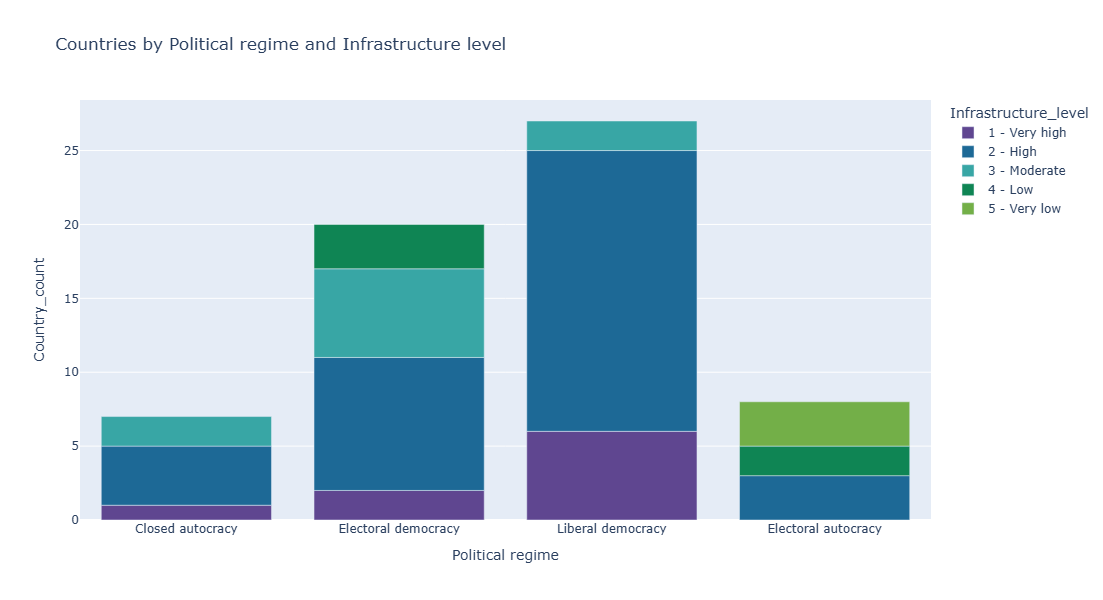

In [60]:
agg_data = infra_df.groupby(['Political regime', 'Infrastructure_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Infrastructure_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Political regime', 
    y='Country_count', 
    color='Infrastructure_level', 
    title="Countries by Political regime and Infrastructure level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\47014830.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



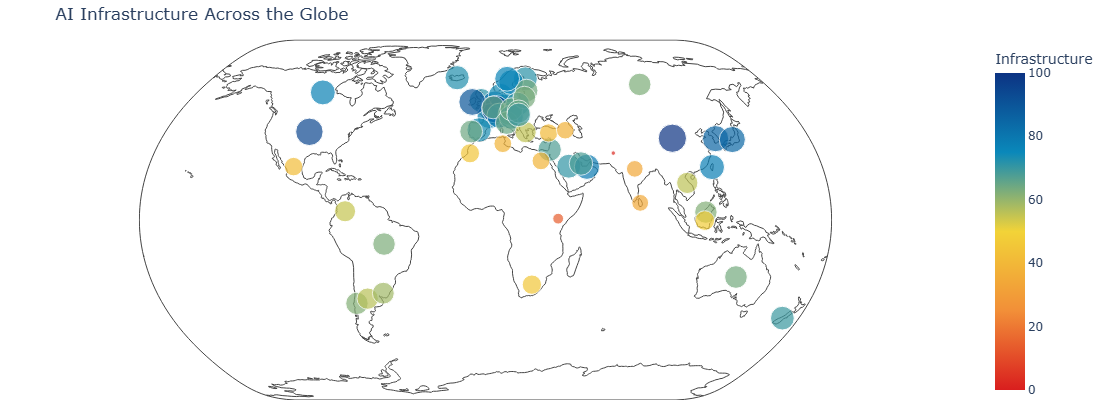

In [61]:
# set the size of the geo bubble
def set_infrastructure_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value 
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

infra_df['Size'] = infra_df.apply(lambda x: set_infrastructure_size(x['Infrastructure']), axis=1)

fig = px.scatter_geo(
    infra_df, locations="Country", locationmode='country names', 
    color="Infrastructure", 
    size='Size', hover_name="Country", 
    range_color= [0, 100], 
    projection="natural earth",
    title='AI Infrastructure Across the Globe', 
    color_continuous_scale="portland_r")
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()

In [62]:
infra_df.sort_values('Infrastructure', 
                   ascending=False)[
                        [ 
                          'Country',
                          'Infrastructure'
                        ]
][:10].style.background_gradient(cmap='seismic')

In [63]:
ops_df = df[['Country','Region', 'Cluster', 'Income group', 'Political regime', 'Operating Environment']]

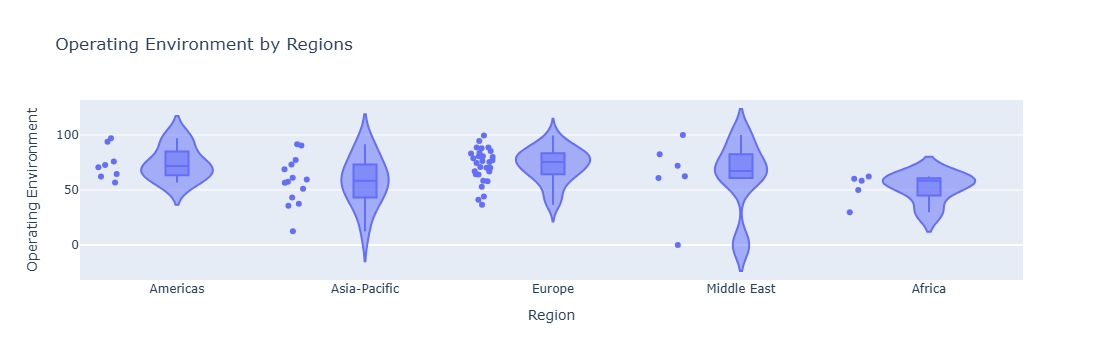

In [64]:
fig = px.violin(ops_df, 
                y="Operating Environment", 
                x="Region", 
                box=True, 
                points="all", 
                title="Operating Environment by Regions", 
                hover_data=ops_df.columns)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\2854977991.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



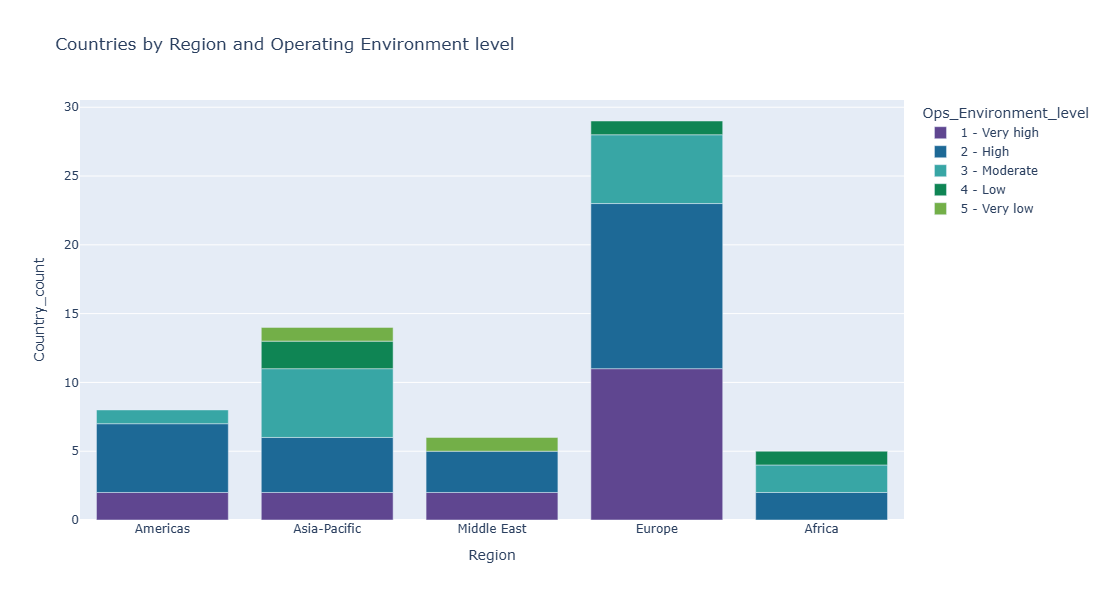

In [65]:
# implement binning by Operating Environment categories

def set_ops_level(x):
    res = "N/A"
    if x >= 80:
        res = "1 - Very high"
    elif x >= 60 and x < 80:
        res = "2 - High"
    elif x >= 40 and x < 60:
        res = "3 - Moderate"
    elif x >= 20 and x < 40:
        res = "4 - Low"
    else:
        res = "5 - Very low"
    return res

ops_df["Ops_Environment_level"] = ops_df["Operating Environment"].apply(set_ops_level)

agg_data = ops_df.groupby(['Region', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])
fig = px.bar(
    agg_data, 
    x='Region', 
    y='Country_count', 
    color='Ops_Environment_level', 
    title="Countries by Region and Operating Environment level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()


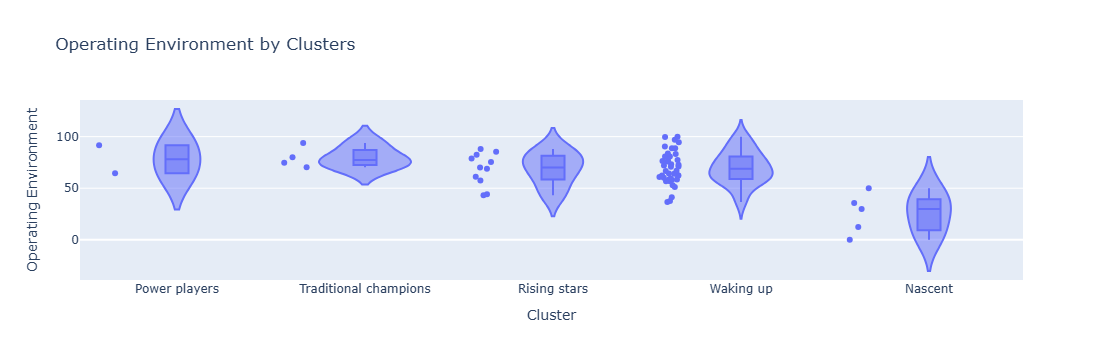

In [66]:
fig = px.violin(ops_df, 
                y="Operating Environment", 
                x="Cluster", 
                box=True, 
                points="all", 
                title="Operating Environment by Clusters", 
                hover_data=ops_df.columns)
fig.show()

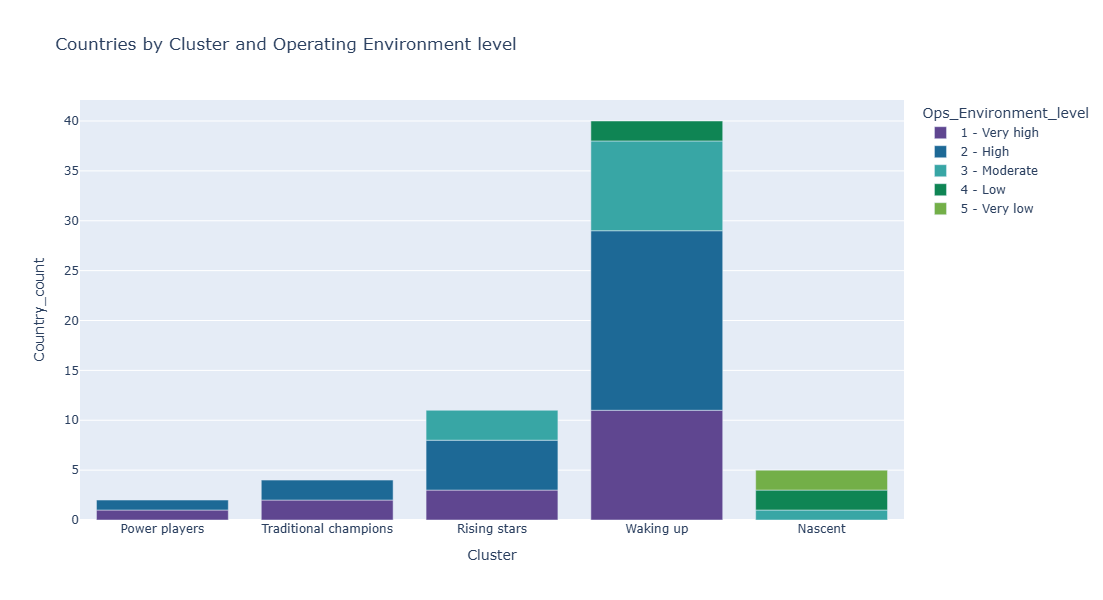

In [67]:
agg_data = ops_df.groupby(['Cluster', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Cluster', 
    y='Country_count', 
    color='Ops_Environment_level', 
    title="Countries by Cluster and Operating Environment level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

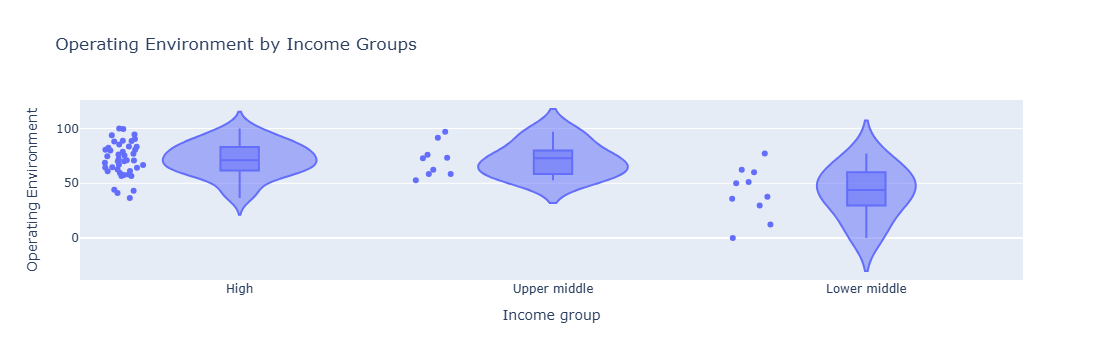

In [68]:
fig = px.violin(ops_df, 
                y="Operating Environment", 
                x="Income group", 
                box=True, 
                points="all", 
                title="Operating Environment by Income Groups", 
                hover_data=ops_df.columns)
fig.show()

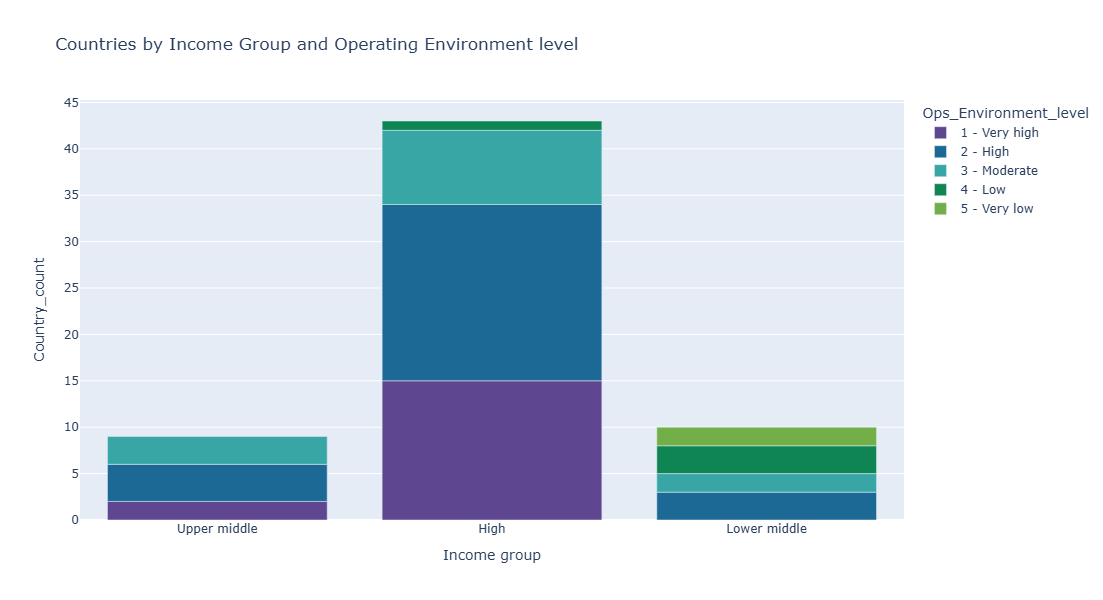

In [69]:
agg_data = ops_df.groupby(['Income group', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Income group', 
    y='Country_count', 
    color='Ops_Environment_level', 
    title="Countries by Income Group and Operating Environment level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

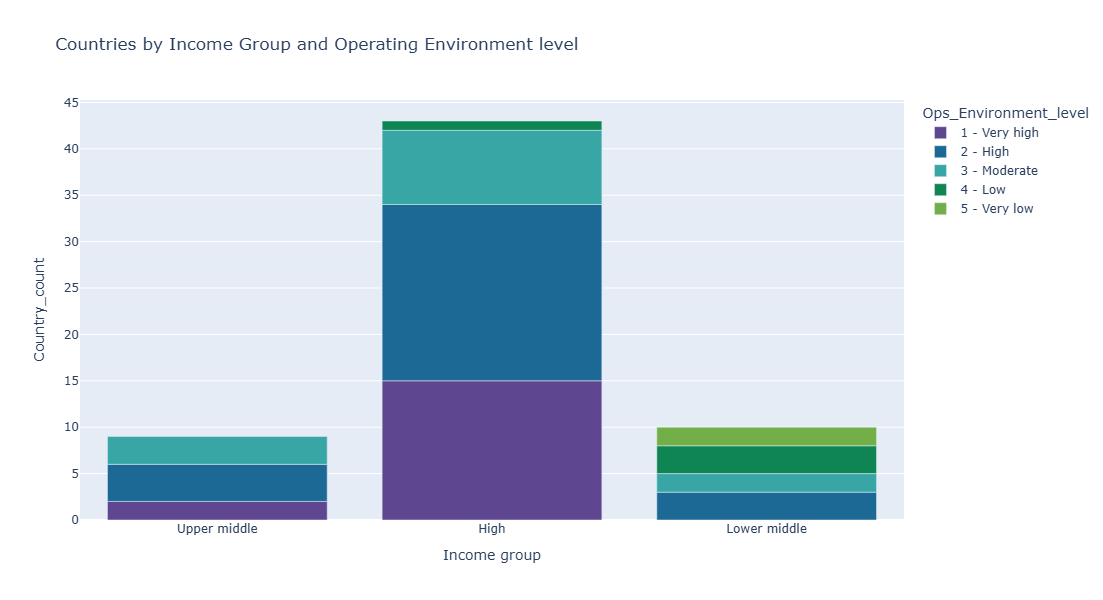

In [70]:
agg_data = ops_df.groupby(['Income group', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Income group', 
    y='Country_count', 
    color='Ops_Environment_level', 
    title="Countries by Income Group and Operating Environment level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

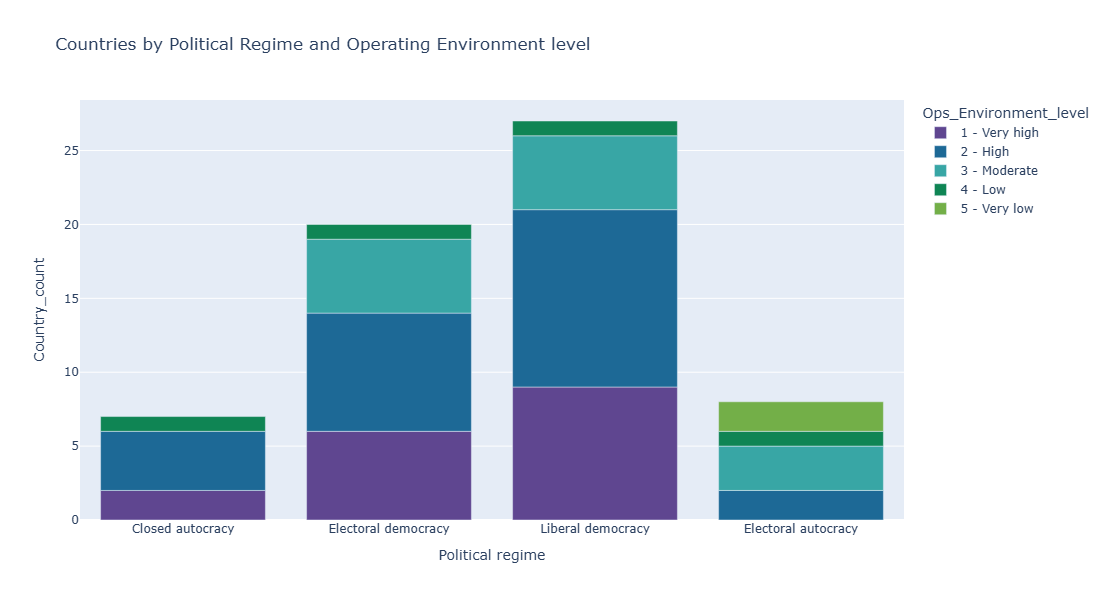

In [71]:
agg_data = ops_df.groupby(['Political regime', 'Ops_Environment_level']).size().reset_index(name='Country_count')

agg_data = agg_data.sort_values(by=["Ops_Environment_level", "Country_count"])

fig = px.bar(
    agg_data, 
    x='Political regime', 
    y='Country_count', 
    color='Ops_Environment_level', 
    title="Countries by Political Regime and Operating Environment level", 
    color_discrete_sequence=px.colors.qualitative.Prism,
    height=600)
fig.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9004\20155000.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



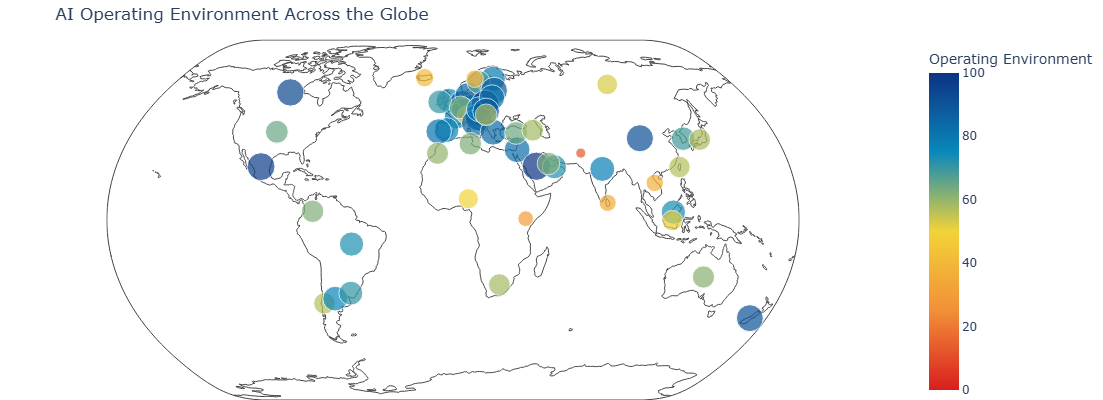

In [72]:
# set the size of the geo bubble
def set_op_env_size(value):
    '''
    Takes the numeric value of a parameter to visualize on a map (Plotly Geo-Scatter plot)
    Returns a number to indicate the size of a bubble for a country which numeric attribute value 
    was supplied as an input
    '''
    result = np.log(1+value/1200)

    if result < 0:
        result = 0.001
    return result

ops_df['Size'] = ops_df.apply(lambda x: set_op_env_size(x['Operating Environment']), axis=1)

fig = px.scatter_geo(
    ops_df, locations="Country", locationmode='country names', 
    color="Operating Environment", 
    size='Size', hover_name="Country", 
    range_color= [0, 100], 
    projection="natural earth",
    title='AI Operating Environment Across the Globe', 
    color_continuous_scale="portland_r")
# Update visual layout
fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=40, b=0, l=5, r=5),
    template="plotly_white",
)

fig.show()


In [73]:
ops_df.sort_values('Operating Environment', 
                   ascending=False)[
                        [ 
                          'Country',
                          'Operating Environment'
                        ]
][:10].style.background_gradient(cmap='seismic')